In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
import time

99% Estimated total time: 70.77733667322303 secondss

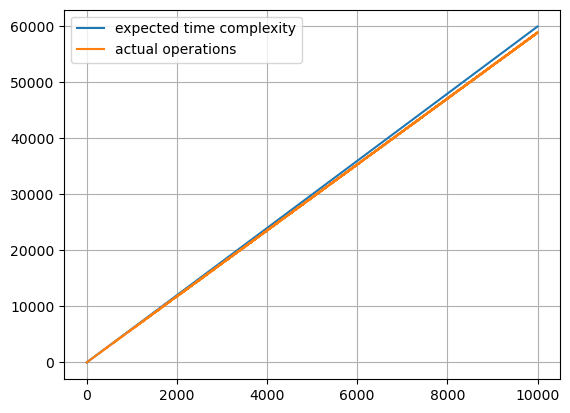

In [11]:
def print_progress(current_iteration, max_iterations, display_eta = True, eta_update_rate = 10):
    if not hasattr(print_progress, "start_seconds"):
        print_progress.start_seconds = time.time() # Initialize on first call
    elif current_iteration == 0:
        print_progress.start_seconds = time.time()
    
    if not hasattr(print_progress, "last_time_seconds"):
        print_progress.last_time_seconds = time.time() - 0.000001
    elif current_iteration == 0:
        print_progress.last_time_seconds = time.time() - 0.000001
    

    
    progress = current_iteration/max_iterations
    sys.stdout.write("\r")
    sys.stdout.write(str(int(100*progress)) + "%")
    if display_eta and current_iteration % eta_update_rate == 1:
        sys.stdout.write(" Estimated total time: " + str((0.1*((max_iterations - current_iteration)*(time.time()-print_progress.last_time_seconds))) + (0.9*((1/progress)*(time.time()-print_progress.start_seconds)))) + " seconds")
    sys.stdout.flush()

    print_progress.last_time_seconds = time.time()


def flatten_list(inpt):
    result_array = []
    for i in range(len(inpt)):
        for j in range(len(inpt[i])):
            result_array.append(inpt[i][j])
    return result_array

# returns a tuple of (sorted list, operations needed, n, d) without modifying original. input must be list of integers
# time complexity is O(n*d) and time complexity function f(n,d) = 2*n*d 
def radix_sort(unsorted):
    operations = 0
    max_digits = math.floor(math.log10(abs(unsorted[0]))) + 1 if unsorted[0] > 0 else 1
    operations += max_digits
    # worst case, this takes O(n * d) where n is length of input and d is amount of digits in longest number
    for number in unsorted:
        curr_digits = math.floor(math.log10(abs(number))) + 1 if number > 0 else 1
        operations  += curr_digits
        if curr_digits > max_digits:
            max_digits = curr_digits
    bins1 = [[] for _ in range(10)]
    
    # O(n), not interesting
    for number in unsorted:
        operations += 1
        bins1[number%10].append(number)
    
    if max_digits == 1:
        return flatten_list(bins1)

    bins2 = [[] for _ in range(10)]
    update_bins2 = True

    # outer loop runs O(d)
    for digit_index in range(1, max_digits):
        if update_bins2:
            bins2 = [[] for _ in range(10)]

            # both these loops essentially take O(n), since these are all list accesses, or math operations. for i: for j: only runs n times.
            for i in range(len(bins1)):
                for j in range(len(bins1[i])):
                    operations += 1
                    bins2[((bins1[i][j])//(10**(digit_index)))%10].append(bins1[i][j])

            update_bins2 = False
        else:
            bins1 = [[] for _ in range(10)]

            for i in range(len(bins2)):
                for j in range(len(bins2[i])):
                    operations += 1
                    bins1[((bins2[i][j])//(10**(digit_index)))%10].append(bins2[i][j])

            update_bins2 = True
    # overall the main logic takes O(n*d)

    return (flatten_list(bins1 if update_bins2 else bins2), operations, len(unsorted), max_digits)

max_length = 10_000
known_d = 3
operation_counts = [0]*(max_length+1)
for known_n in range(1, len(operation_counts)):
    print_progress(known_n-1, max_length)
    given_array = list(np.random.randint(0, 10**known_d, known_n))
    sorted, operation_count, n, d = radix_sort(given_array)
    operation_counts[known_n] = operation_count

x_values = list(range(0, max_length+1))
expected_y = [2*n*known_d for n in x_values]
plt.plot(x_values, expected_y, label="expected time complexity")
plt.plot(x_values, operation_counts, label="actual operations")
plt.legend()
plt.grid()
plt.show()